In [22]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import cm
plt.style.use('ggplot')
# Ideal para mostrar información más bonita :)
from IPython.display import display

dataset = pd.read_csv("data2.csv", encoding = 'utf8', sep=";")

In [25]:
df = dataset.groupby(["show", "score"]).count()
print(df.info())

# Since we need to count, we can delete one column and rename the only one to count.
del df['name_chapter']
df.columns = ["count"]
display(df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51 entries, (Band of Brothers, 8.7) to (Planet Earth II, 9.1)
Data columns (total 2 columns):
chapter         51 non-null int64
name_chapter    51 non-null int64
dtypes: int64(2)
memory usage: 1.2+ KB
None


count
show             score       
Band of Brothers 8.7        2
                 8.8        2
                 9.0        2
                 9.1        2
                 9.2        1
                 9.3        1
Breaking Bad     7.8        1
                 8.1        1
                 8.3        4
                 8.4        3
                 8.5        4
                 8.6        2
                 8.7        8
                 8.8        2
                 8.9        7
                 9.0        2
                 9.1        3
                 9.2        7
                 9.3        2
                 9.4        2
                 9.5        2
                 9.6        8
                 9.8        1
                 9.9        2
                 10.0       1
Game of Thrones  8.0        1
                 8.3        1
                 8.4        1
                 8.5        3
                 8.6        4
                 8.7        5
                 8.8       11
                 8.9        4
                 9.0        6
                 9.1        4
                 9.2        3
                 9.4        3
                 9.5        3
                 9.6        2
                 9.7        5
                 9.9        4
Planet Earth     8.3        6
                 8.4        3
                 8.5        1
                 8.7        1
Planet Earth II  4.4        1
                 7.8        1
                 8.0        1
                 8.1        2
                 8.5        1
                 9.1        1

In [26]:
#Now apply the normal distribution for each serie
shows = list(set(map(lambda x: x[0], df.index)))

df["distribution"] = df['count'] / dataset.groupby("show").count()['chapter']

In [27]:
display(df)

count  distribution
show             score                     
Band of Brothers 8.7        2      0.200000
                 8.8        2      0.200000
                 9.0        2      0.200000
                 9.1        2      0.200000
                 9.2        1      0.100000
                 9.3        1      0.100000
Breaking Bad     7.8        1      0.016129
                 8.1        1      0.016129
                 8.3        4      0.064516
                 8.4        3      0.048387
                 8.5        4      0.064516
                 8.6        2      0.032258
                 8.7        8      0.129032
                 8.8        2      0.032258
                 8.9        7      0.112903
                 9.0        2      0.032258
                 9.1        3      0.048387
                 9.2        7      0.112903
                 9.3        2      0.032258
                 9.4        2      0.032258
                 9.5        2      0.032258
                 9.6        8      0.129032
                 9.8        1      0.016129
                 9.9        2      0.032258
                 10.0       1      0.016129
Game of Thrones  8.0        1      0.016667
                 8.3        1      0.016667
                 8.4        1      0.016667
                 8.5        3      0.050000
                 8.6        4      0.066667
                 8.7        5      0.083333
                 8.8       11      0.183333
                 8.9        4      0.066667
                 9.0        6      0.100000
                 9.1        4      0.066667
                 9.2        3      0.050000
                 9.4        3      0.050000
                 9.5        3      0.050000
                 9.6        2      0.033333
                 9.7        5      0.083333
                 9.9        4      0.066667
Planet Earth     8.3        6      0.545455
                 8.4        3      0.272727
                 8.5        1      0.090909
                 8.7        1      0.090909
Planet Earth II  4.4        1      0.142857
                 7.8        1      0.142857
                 8.0        1      0.142857
                 8.1        2      0.285714
                 8.5        1      0.142857
                 9.1        1      0.142857

We need to set all values of the scale that aren't "data" to 0, because `fill_between` fails if we don't do this

In [28]:
new_index = [(show, score) for show in shows for score in np.arange(0, 10, 0.1)]
df = df.reindex(new_index, fill_value=0)

In [29]:
# get the colors!
cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, len(shows))]
colors = zip(shows, colors)
colors = dict(colors)

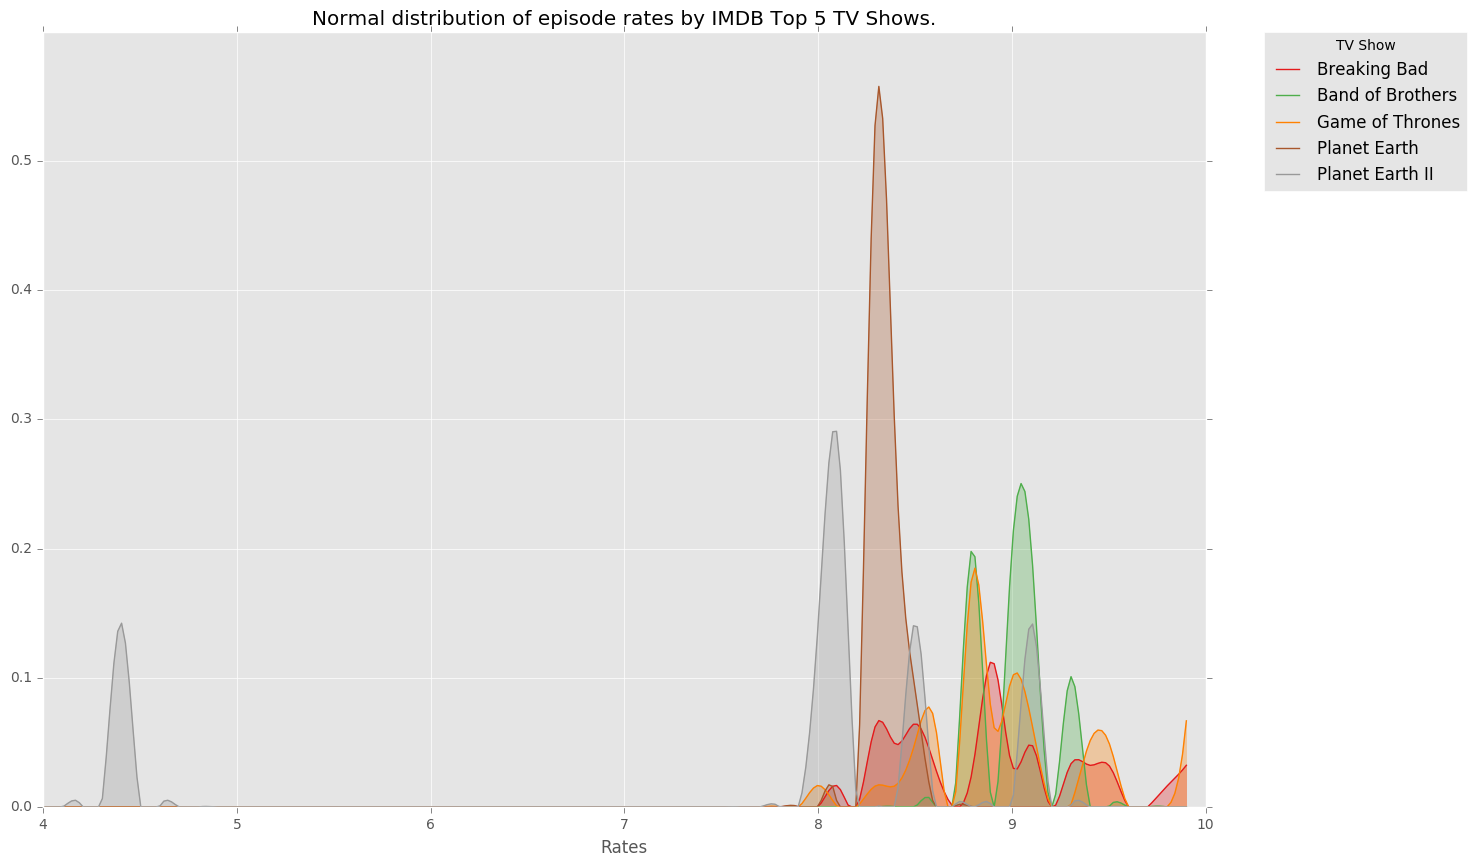

In [31]:
plt.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure()
ax_1 = fig.add_subplot(111)

for key in shows:
    # we need the scores as an independent variable, so we reset the index and sort by the score.
    show = df.loc[key].reset_index().sort_values(by="score")
    
    # smoothing the curve because reasons
    x_smooth = np.linspace(show.min()['score'], show.max()['score'], 500)
    y_smooth = spline(show['score'], show['distribution'], x_smooth)
    
    # y_smooth ends with negative values (which doesn't exist in the real dataset), so I erased them.
    y_smooth = [y if y > 0 else 0 for y in y_smooth]
    ax_1.plot(x_smooth, y_smooth, label=key, color=colors[key])
    ax_1.fill_between(x_smooth, y_smooth, color=colors[key], alpha=0.3)

plt.ylim(0, 0.6)
plt.xlim(4, 10)
plt.title("Normal distribution of episode rates by IMDB Top 5 TV Shows.")
plt.xlabel("Rates")
plt.legend(title="TV Show", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()